In [34]:
pip install ../../

Defaulting to user installation because normal site-packages is not writeable
Processing /home/mehdi/Straph
  Preparing metadata (setup.py) ... done
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=128911 sha256=0c0e9430dee87dbc25a2ef0bf3e72ae5fd5c0d3f977200c10545bb351ad1ec70
  Stored in directory: /tmp/pip-ephem-wheel-cache-5sxpuwb1/wheels/ff/7b/fd/74f1a0c1e7fef46f5399a409f7bb3afe2da4ba468d26b5f5b7
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
Note: you may need to restart the kernel to use updated packages.


In [1]:
#sigmasv_links.sg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt
import straph.betweenness.volumes as vol
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "any_nodes.sg",
                      path_links=path_directory + "any_links.sg")
S.describe()

Nb of Nodes :  6
Nb of segmented nodes :  6.0
Nb of links :  22
Nb of segmented links :  32.0
Nb of event times :  26


<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


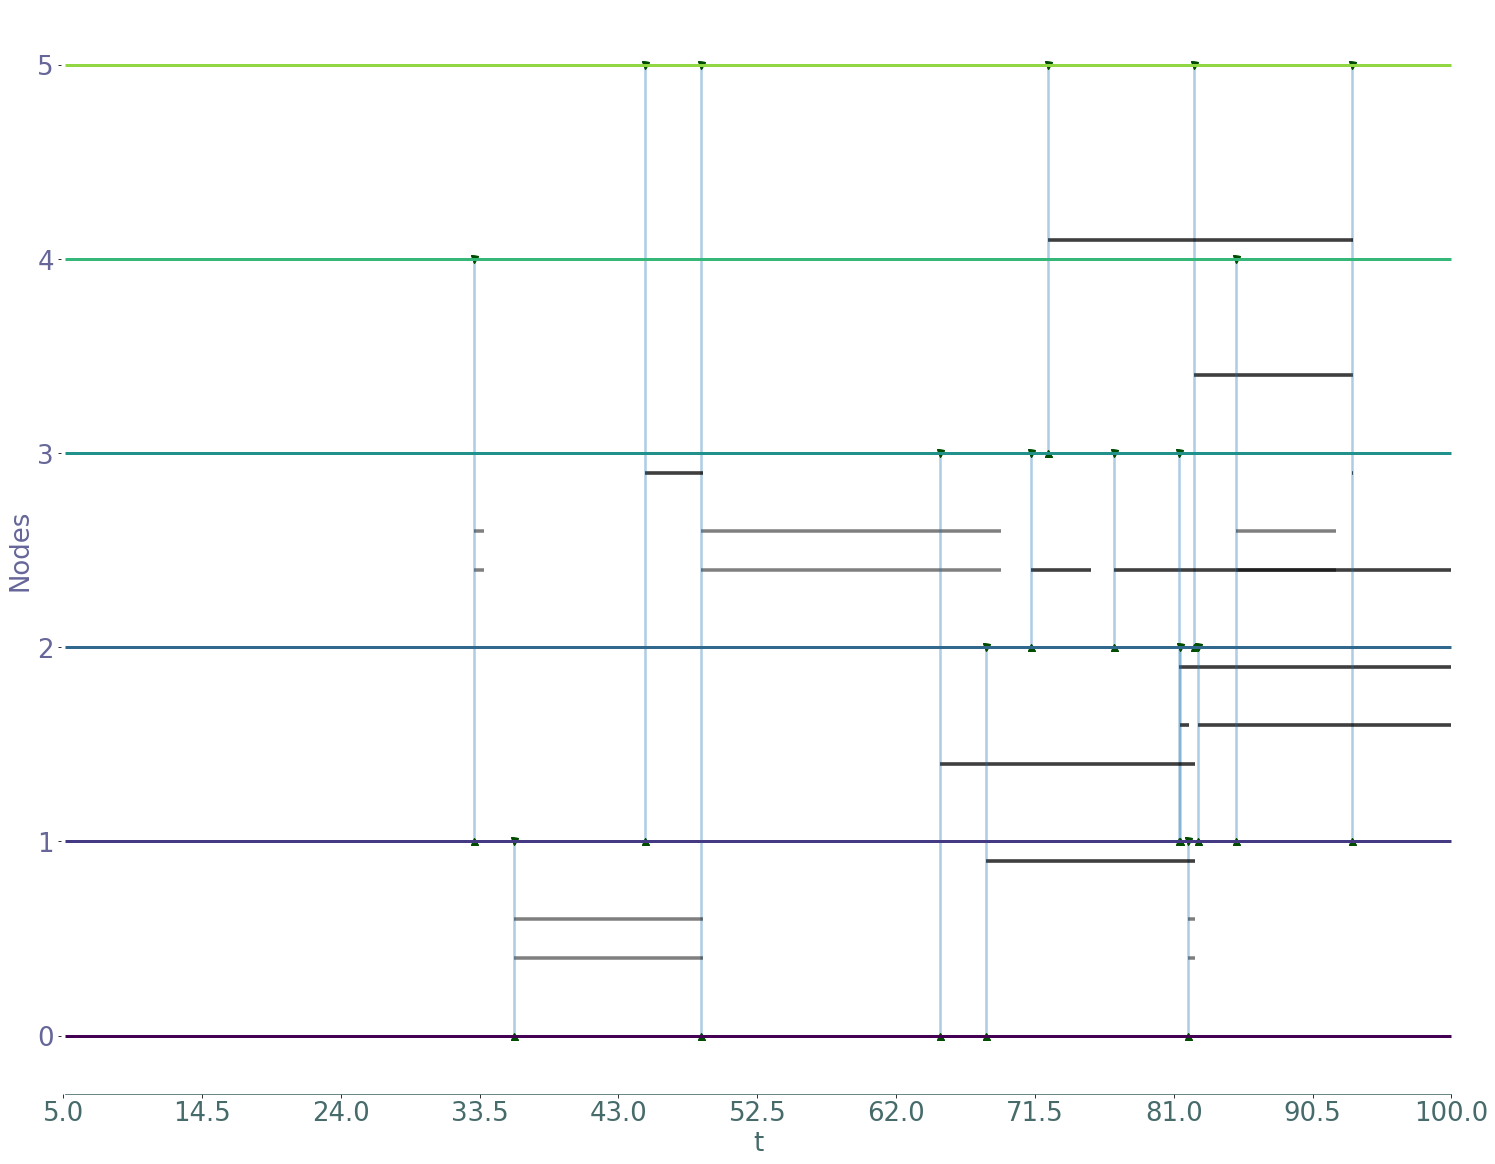

In [2]:
S.plot()

In [3]:
#for i in range(0,2*int(max(list(S.event_times())))):
#    S.add_point(i/2)
S.sg_to_streamfig("stream_example","eps")
nouveau = S.fragmented_stream_graph()

In [4]:
#nouveau.plot()
#plt.savefig("link_s_con.png",dpi=300,bbox_inches ='tight' )

In [5]:
events, events_reverse = bt.events_dic(nouveau)

In [6]:
link_ind = bt.link_index(nouveau)
neighbors, neighbors_inv = bt.neighbors_direct(nouveau)
unt = bt.until(nouveau, events, events_reverse)

In [7]:
node = 4

In [8]:
pre, cur_best = bt.dijkstra_directed(nouveau, node, events, events_reverse, neighbors, link_ind, neighbors_inv, unt)
cur_b_arr = bt. cur_best_to_array(nouveau, cur_best, events, events_reverse)

neighbors 4 1 {(33.76943191989939, (33.11339237272777, 33.76943191989939)), (85.27017133562094, (85.27017133562094, 85.27017133562094)), (33.11339237272777, (33.11339237272777, 33.11339237272777)), (92.08956182622858, (85.27017133562094, 92.08956182622858))}
st 4 33.11339237272777
st 4 33.76943191989939
st 4 85.27017133562094
st 4 92.08956182622858


In [9]:
cur_best[2]

{5.1280926173820855: (-inf, inf),
 33.11339237272777: (-inf, inf),
 33.76943191989939: (-inf, inf),
 35.82491486774059: (-inf, inf),
 44.82329873576048: (-inf, inf),
 48.68323538848274: (-inf, inf),
 48.792683472715254: (-inf, inf),
 64.99810322497737: (-inf, inf),
 68.13350776730395: (33.76943191989939, 3),
 69.20475316493786: (33.76943191989939, 3),
 71.24400926336597: (33.76943191989939, 3),
 72.41193737375828: (33.76943191989939, 3),
 75.37019604278595: (33.76943191989939, 3),
 76.88948682335598: (33.76943191989939, 3),
 81.33415585473844: (33.76943191989939, 3),
 81.46205605429729: (33.76943191989939, 2),
 81.98783734159767: (33.76943191989939, 2),
 82.06370663551144: (33.76943191989939, 2),
 82.40214401501606: (33.76943191989939, 2),
 82.47284490842026: (33.76943191989939, 2),
 82.6859265978688: (33.76943191989939, 2),
 85.27017133562094: (85.27017133562094, 2),
 92.08956182622858: (92.08956182622858, 2),
 93.16969084654261: (92.08956182622858, 2),
 93.29182810066902: (92.0895618

In [10]:
cur_b_arr[2]

[(5.1280926173820855, -inf, inf),
 (33.11339237272777, -inf, inf),
 (33.76943191989939, -inf, inf),
 (35.82491486774059, -inf, inf),
 (44.82329873576048, -inf, inf),
 (48.68323538848274, -inf, inf),
 (48.792683472715254, -inf, inf),
 (64.99810322497737, -inf, inf),
 (68.13350776730395, 33.76943191989939, 3),
 (69.20475316493786, 33.76943191989939, 3),
 (71.24400926336597, 33.76943191989939, 3),
 (72.41193737375828, 33.76943191989939, 3),
 (75.37019604278595, 33.76943191989939, 3),
 (76.88948682335598, 33.76943191989939, 3),
 (81.33415585473844, 33.76943191989939, 3),
 (81.46205605429729, 33.76943191989939, 2),
 (81.98783734159767, 33.76943191989939, 2),
 (82.06370663551144, 33.76943191989939, 2),
 (82.40214401501606, 33.76943191989939, 2),
 (82.47284490842026, 33.76943191989939, 2),
 (82.6859265978688, 33.76943191989939, 2),
 (85.27017133562094, 85.27017133562094, 2),
 (92.08956182622858, 92.08956182622858, 2),
 (93.16969084654261, 92.08956182622858, 2),
 (93.29182810066902, 92.0895618

In [11]:
lat = bt.latencies(nouveau, cur_b_arr, events, events_reverse)
lat_triplet, lat_rev_triplet = bt.latencies_without_0_and_rev(nouveau, lat, events)

In [12]:
G = bt.predecessor_graph(nouveau, pre,node)
GG = bt.graph_to_ordered(G, events, events_reverse)
Gp = bt.instant_graphs(G)
GT = bt.interval_graph(Gp)

In [13]:
# import networkx as nx
# GD = G.graph
# ren = dict()
# for e in GD.nodes:
#     ren[e] = (S.node_to_label[e[0]],e[1])
# #print(ren)
# GN =  nx.relabel_nodes(GD, ren, copy=True)
# fig, ax = plt.subplots(figsize=(30,30))
# nx.draw_networkx(GN,arrows=True,width = 1,ax = ax)

In [14]:
# cc = nx.connected_components(nx.to_undirected(GN))
# sg = []
# for e in cc:
#     sg.append(GN.subgraph(list(e)))

In [15]:
# for i in range(0,len(sg)):
#     fig, ax = plt.subplots(figsize=(25,25))
#     pos = nx.circular_layout(GN)
#     nx.draw(
#     sg[i], pos, edge_color='black',
#     node_size=5000, node_color='pink', alpha=0.9, fontsize=100,  with_labels = True
    
# )
#     #edge_l = dict()
#     #for e in GN.edges():
#      #   edge_l[e] = GN[e[0]][e[1]]['interval']
#     #nx.draw_networkx_edge_labels(
#     #sg[i], pos,
#     #edge_labels=edge_l,
#     #font_color='red'
# #)
#     plt.savefig("stream_cc_con"+str(i)+".png" )

In [16]:
edge = bt.edges(nouveau)

In [17]:
before, after = bt.volume_instantenuous(nouveau, G, events, events_reverse, edge)
mx = bt.max_volume_superposition(GT)
print(mx)

2


In [18]:
before

{0: {5.1280926173820855: False,
  33.11339237272777: False,
  33.76943191989939: False,
  35.82491486774059: False,
  44.82329873576048: False,
  48.68323538848274: False,
  48.792683472715254: False,
  64.99810322497737: False,
  68.13350776730395: False,
  69.20475316493786: False,
  71.24400926336597: False,
  72.41193737375828: False,
  75.37019604278595: False,
  76.88948682335598: False,
  81.33415585473844: False,
  81.46205605429729: False,
  81.98783734159767: False,
  82.06370663551144: False,
  82.40214401501606: False,
  82.47284490842026: False,
  82.6859265978688: False,
  85.27017133562094: False,
  92.08956182622858: False,
  93.16969084654261: False,
  93.29182810066902: False,
  100.0: False},
 1: {5.1280926173820855: False,
  33.11339237272777: False,
  33.76943191989939: True,
  35.82491486774059: False,
  44.82329873576048: False,
  48.68323538848274: False,
  48.792683472715254: False,
  64.99810322497737: False,
  68.13350776730395: False,
  69.20475316493786: Fa

In [19]:
sigma = bt.volume_metapaths_at_t(G, node, cur_best, mx)
f_edge = bt.dictionary_first_edge(G,  cur_best)
sigma_r = bt.optimal_with_resting_con(nouveau, node, f_edge, events, G, sigma, cur_best, unt)

In [20]:
sigma_r

{(0, 5.1280926173820855): vol(0,0),
 (0, 33.11339237272777): vol(0,0),
 (0, 33.76943191989939): vol(0,0),
 (0, 35.82491486774059): vol(1,0),
 (0, 44.82329873576048): vol(8.998383868019893,1),
 (0, 48.68323538848274): vol(12.858320520742154,1),
 (0, 48.792683472715254): vol(12.967768604974665,1),
 (0, 64.99810322497737): vol(12.967768604974665,1),
 (0, 68.13350776730395): vol(12.967768604974665,1),
 (0, 69.20475316493786): vol(12.967768604974665,1),
 (0, 71.24400926336597): vol(12.967768604974665,1),
 (0, 72.41193737375828): vol(12.967768604974665,1),
 (0, 75.37019604278595): vol(12.967768604974665,1),
 (0, 76.88948682335598): vol(12.967768604974665,1),
 (0, 81.33415585473844): vol(12.967768604974665,1),
 (0, 81.46205605429729): vol(12.967768604974665,1),
 (0, 81.98783734159767): vol(12.967768604974665,1),
 (0, 82.06370663551144): vol(13.043637898888434,1),
 (0, 82.40214401501606): vol(13.38207527839306,1),
 (0, 82.47284490842026): vol(13.452776171797254,1),
 (0, 82.6859265978688): vol(

In [21]:
contri, prev_next = bt.contribution_each_latency_con(nouveau, lat_rev_triplet,events[0],events[len(events)-1], before, after)
latence_arrival = {v : { y: [x,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }
latence_depar = {v : { x : [y,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }

1 0 2 1 [[33.11339237272777, 33.11339237272777, 1], [33.76943191989939, 33.76943191989939, 1], [85.27017133562094, 85.27017133562094, 1], [92.08956182622858, 92.08956182622858, 1]]
2 1 1 1 [[33.11339237272777, 33.11339237272777, 1], [33.76943191989939, 33.76943191989939, 1], [85.27017133562094, 85.27017133562094, 1], [92.08956182622858, 92.08956182622858, 1]]
3 2 2 1 [[33.11339237272777, 33.11339237272777, 1], [33.76943191989939, 33.76943191989939, 1], [85.27017133562094, 85.27017133562094, 1], [92.08956182622858, 92.08956182622858, 1]]
1 0 -1 2 [[68.13350776730395, 33.76943191989939, 3], [85.27017133562094, 85.27017133562094, 2], [92.08956182622858, 92.08956182622858, 2]]
2 1 2 2 [[68.13350776730395, 33.76943191989939, 3], [85.27017133562094, 85.27017133562094, 2], [92.08956182622858, 92.08956182622858, 2]]
1 0 -1 3 [[64.99810322497737, 33.76943191989939, 3], [85.27017133562094, 85.27017133562094, 2], [92.08956182622858, 92.08956182622858, 2]]
2 1 2 3 [[64.99810322497737, 33.769431919

In [22]:
contri

[{35.82491486774059: (5.1280926173820855, 100.0)},
 {33.11339237272777: (5.1280926173820855, 33.11339237272777),
  33.76943191989939: (33.76943191989939, 85.27017133562094),
  85.27017133562094: (33.76943191989939, 85.27017133562094),
  92.08956182622858: (92.08956182622858, 100.0)},
 {68.13350776730395: (5.1280926173820855, 85.27017133562094),
  85.27017133562094: (5.1280926173820855, 85.27017133562094),
  92.08956182622858: (92.08956182622858, 100.0)},
 {64.99810322497737: (5.1280926173820855, 85.27017133562094),
  85.27017133562094: (5.1280926173820855, 85.27017133562094),
  92.08956182622858: (92.08956182622858, 100.0)},
 {33.11339237272777: (5.1280926173820855, 100.0),
  33.76943191989939: (5.1280926173820855, 100.0),
  85.27017133562094: (5.1280926173820855, 100.0),
  92.08956182622858: (5.1280926173820855, 100.0)},
 {44.82329873576048: (5.1280926173820855, 85.27017133562094),
  85.27017133562094: (5.1280926173820855, 85.27017133562094),
  92.08956182622858: (92.08956182622858, 1

In [23]:
deltasvvt = bt.dictionary_svvt(G, node, latence_arrival, contri, prev_next, sigma_r,  latence_depar)

In [24]:
deltasvvt

{(1, 33.76943191989939): vol(0,0),
 (0, 35.82491486774059): vol(1838.0603880409753,0),
 (0, 44.82329873576048): vol(0,0),
 (0, 48.68323538848274): vol(0,0),
 (0, 48.792683472715254): vol(0,0),
 (0, 81.98783734159767): vol(0,0),
 (0, 82.06370663551144): vol(0,0),
 (0, 82.40214401501606): vol(0,0),
 (0, 82.47284490842026): vol(0,0),
 (4, 33.11339237272777): vol(0,0),
 (1, 33.11339237272777): vol(0,0),
 (4, 33.76943191989939): vol(0,0),
 (4, 85.27017133562094): vol(0,0),
 (1, 85.27017133562094): vol(0,0),
 (4, 92.08956182622858): vol(0,0),
 (1, 92.08956182622858): vol(0,0),
 (2, 68.13350776730395): vol(490.81699577325384,0),
 (2, 69.20475316493786): vol(0,0),
 (2, 71.24400926336597): vol(0,0),
 (2, 72.41193737375828): vol(0,0),
 (2, 75.37019604278595): vol(0,0),
 (2, 76.88948682335598): vol(0,0),
 (2, 81.33415585473844): vol(0,0),
 (3, 81.33415585473844): vol(0,0),
 (2, 81.46205605429729): vol(0,0),
 (2, 81.98783734159767): vol(0,0),
 (2, 82.06370663551144): vol(0,0),
 (2, 82.685926597868

In [25]:
deltasvvt[(1,48.792683472715254)]

KeyError: (1, 48.792683472715254)

In [26]:
preced = bt.preced_node(nouveau, G,events,events_reverse)

In [27]:
preced[1]

{33.11339237272777: 33.11339237272777,
 33.76943191989939: 33.76943191989939,
 85.27017133562094: 85.27017133562094,
 92.08956182622858: 92.08956182622858,
 35.82491486774059: 33.76943191989939,
 44.82329873576048: 33.76943191989939,
 48.68323538848274: 33.76943191989939,
 48.792683472715254: 33.76943191989939,
 64.99810322497737: 33.76943191989939,
 68.13350776730395: 33.76943191989939,
 69.20475316493786: 33.76943191989939,
 71.24400926336597: 33.76943191989939,
 72.41193737375828: 33.76943191989939,
 75.37019604278595: 33.76943191989939,
 76.88948682335598: 33.76943191989939,
 81.33415585473844: 33.76943191989939,
 81.46205605429729: 33.76943191989939,
 81.98783734159767: 33.76943191989939,
 82.06370663551144: 33.76943191989939,
 82.40214401501606: 33.76943191989939,
 82.47284490842026: 33.76943191989939,
 82.6859265978688: 33.76943191989939,
 93.16969084654261: 92.08956182622858,
 93.29182810066902: 92.08956182622858,
 100.0: 92.08956182622858}

In [28]:
events_reverse[95.47751115578663]

KeyError: 95.47751115578663

In [29]:
contribution = bt.general_contribution_from_node(nouveau, G, node, GG, sigma_r, deltasvvt, events, events_reverse, pre, GT, unt, preced)

node 4 (v,t) 1 92.08956182622858 tp 100.0
event[jjj] 100.0
ici node 4 (v,t) 1 92.08956182622858 t_p 100.0 event[jjj] 100.0 s vol(0,0)  jj+1 25 event_reverse[l_nei[v,t][ii][0]]+1 26 l_nei[v,t] [[92.08956182622858, [2, 3]], [93.16969084654261, [2, 3, 5]], [93.29182810066902, [2, 3, 5]], [100.0, [2, 3]]] ii 3 val_cont_int vol(0,0)
node 4 (v,t) 1 92.08956182622858 tp 93.29182810066902
event[jjj] 93.29182810066902
ici node 4 (v,t) 1 92.08956182622858 t_p 93.29182810066902 event[jjj] 93.29182810066902 s vol(0,0)  jj+1 24 event_reverse[l_nei[v,t][ii][0]]+1 25 l_nei[v,t] [[92.08956182622858, [2, 3]], [93.16969084654261, [2, 3, 5]], [93.29182810066902, [2, 3, 5]], [100.0, [2, 3]]] ii 2 val_cont_int vol(0,0)
node 4 (v,t) 1 92.08956182622858 tp 93.16969084654261
event[jjj] 93.16969084654261
ici node 4 (v,t) 1 92.08956182622858 t_p 93.16969084654261 event[jjj] 93.16969084654261 s vol(0,0)  jj+1 23 event_reverse[l_nei[v,t][ii][0]]+1 24 l_nei[v,t] [[92.08956182622858, [2, 3]], [93.16969084654261, [2

In [30]:
contribution

({2: {100.0: vol(0,0),
   93.29182810066902: vol(0,0),
   93.16969084654261: vol(0,0),
   92.08956182622858: vol(0,0),
   85.27017133562094: vol(0,0),
   82.6859265978688: vol(0,0),
   82.06370663551144: vol(0,0),
   81.98783734159767: vol(0,0),
   81.46205605429729: vol(0,0),
   81.33415585473844: vol(0,0),
   76.88948682335598: vol(0,0),
   75.37019604278595: vol(0,0),
   72.41193737375828: vol(0,0),
   71.24400926336597: vol(0,0),
   69.20475316493786: vol(0,0),
   68.13350776730395: vol(490.81699577325384,0),
   5.1280926173820855: vol(0,0),
   33.11339237272777: vol(0,0),
   33.76943191989939: vol(0,0),
   35.82491486774059: vol(0,0),
   44.82329873576048: vol(0,0),
   48.68323538848274: vol(0,0),
   48.792683472715254: vol(0,0),
   64.99810322497737: vol(0,0),
   82.40214401501606: vol(0,0),
   82.47284490842026: vol(0,0)},
  3: {100.0: vol(0,0),
   93.29182810066902: vol(0,0),
   93.16969084654261: vol(0,0),
   92.08956182622858: vol(0,0),
   85.27017133562094: vol(0,0),
   82.6

In [31]:
contribution[0][1]

{100.0: vol(0,0),
 93.29182810066902: vol(0,0),
 93.16969084654261: vol(0,0),
 92.08956182622858: vol(0,0),
 85.27017133562094: vol(0,0),
 82.6859265978688: vol(0,0),
 82.47284490842026: vol(0,0),
 82.40214401501606: vol(0,0),
 82.06370663551144: vol(0,0),
 81.98783734159767: vol(0,0),
 81.46205605429729: vol(0,0),
 64.99810322497737: vol(0,0),
 68.13350776730395: vol(0,0),
 69.20475316493786: vol(0,0),
 71.24400926336597: vol(0,0),
 72.41193737375828: vol(0,0),
 75.37019604278595: vol(0,0),
 76.88948682335598: vol(0,0),
 81.33415585473844: vol(0,0),
 48.792683472715254: vol(0.0,0),
 48.68323538848274: vol(9.042931016941623,0),
 44.82329873576048: vol(1486.4151478241788,0),
 35.82491486774059: vol(4067.949166793206,0),
 33.76943191989939: vol(4067.949166793206,0),
 33.11339237272777: vol(0,0),
 5.1280926173820855: vol(0,0)}

In [32]:
for e in list(G.graph[(0 ,95.47751115578663)]):
    print(e)

KeyError: (0, 95.47751115578663)